In [1]:
import torch

from lafomo.utilities.torch import save, load

from lafomo.variational.models import NonLinearLFM, ExponentialLFM
from lafomo.variational.trainer import TranscriptionalTrainer
from lafomo.options import VariationalOptions
from lafomo.data_loaders import HafnerData
from lafomo.plot import Plotter
from matplotlib import pyplot as plt

import numpy as np

f64 = np.float64

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]) tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])


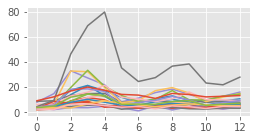

In [2]:
dataset = HafnerData(replicate=0, data_dir='../data/', extra_targets=False)
num_replicates = 1
num_genes = len(dataset.gene_names)
num_tfs = 1
num_times = dataset[0][0].shape[0]

print(dataset[0][0], dataset.t)
t_inducing = torch.linspace(0, 12, num_times, dtype=torch.float64).reshape((-1, 1))
t_observed = torch.linspace(0, 12, num_times)
t_predict = torch.linspace(-2, 14, 80, dtype=torch.float64)

m_observed = torch.stack([
    dataset[i][1] for i in range(num_genes*num_replicates)
]).view(num_replicates, num_genes, num_times)

plt.figure(figsize=(4, 2))
for i in range(22):
    plt.plot(dataset[i][1])

In [3]:
options = VariationalOptions(
    learn_inducing=False,
    num_samples=50,
    kernel_scale=False,
    initial_conditions=True
)

model = NonLinearLFM(num_genes, num_tfs, t_inducing, dataset, options)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
trainer = TranscriptionalTrainer(model, optimizer, dataset)
plotter = Plotter(model, np.array(dataset.gene_names))

C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models\model.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.inducing_inputs = Parameter(torch.tensor(t_inducing), requires_grad=options.learn_inducing)
C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models\model.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.initial_conditions = Parameter(torch.tensor(torch.zeros(self.num_outputs, 1)), requires_grad=True)


### Outputs prior to training:

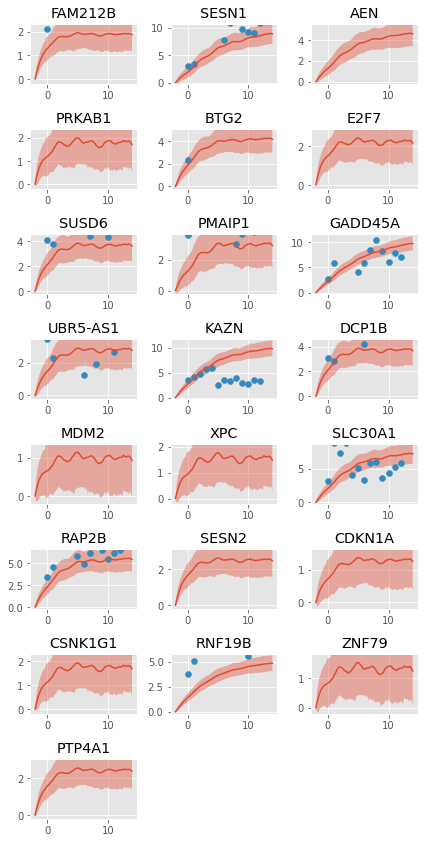

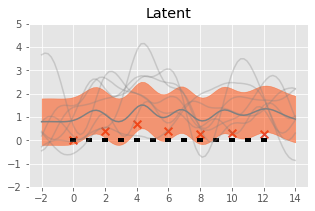

In [4]:
rtol = 1e-2
atol = rtol/10

model_kwargs = {
    'rtol': rtol, 'atol': atol
}

plotter.plot_outputs(t_predict, t_scatter=t_observed,y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_latents(t_predict, ylim=(-2, 5), plot_barenco=True, plot_inducing=False)

Epoch 1/100 - Loss: 14962.01 (14962.01 0.00) λ: 1.423 b: 0.98 d 0.58 s: 0.47
Epoch 6/100 - Loss: 7012.24 (6995.21 17.03) λ: 1.111 b: 1.31 d 0.40 s: 0.77
Epoch 11/100 - Loss: 3756.61 (3735.49 21.12) λ: 0.863 b: 1.33 d 0.64 s: 0.76
Epoch 16/100 - Loss: 2245.12 (2218.06 27.06) λ: 0.694 b: 1.43 d 0.70 s: 0.95
Epoch 21/100 - Loss: 1625.38 (1586.86 38.53) λ: 0.534 b: 1.50 d 0.74 s: 1.09
Epoch 26/100 - Loss: 1260.61 (1212.34 48.26) λ: 0.443 b: 1.49 d 0.85 s: 1.01
Epoch 31/100 - Loss: 1051.75 (995.58 56.18) λ: 0.480 b: 1.45 d 0.95 s: 0.87
Epoch 36/100 - Loss: 967.42 (910.01 57.41) λ: 0.447 b: 1.44 d 0.98 s: 0.82
Epoch 41/100 - Loss: 878.28 (816.71 61.57) λ: 0.443 b: 1.46 d 0.95 s: 0.85
Epoch 46/100 - Loss: 826.52 (766.22 60.30) λ: 0.443 b: 1.45 d 0.93 s: 0.81
Epoch 51/100 - Loss: 788.55 (729.86 58.69) λ: 0.489 b: 1.44 d 0.91 s: 0.75
Epoch 56/100 - Loss: 752.22 (693.59 58.63) λ: 0.523 b: 1.42 d 0.89 s: 0.70
Epoch 61/100 - Loss: 741.05 (683.42 57.63) λ: 0.569 b: 1.41 d 0.86 s: 0.70
Epoch 66/100 

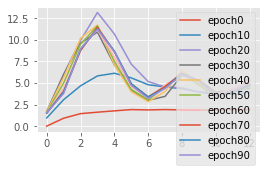

In [5]:
tol = 1e-3
# trainer = Trainer(optimizer)
output = trainer.train(100, rtol=tol, atol=tol/10, report_interval=5, plot_interval=10)

### Outputs after training

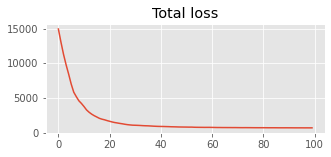

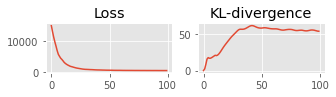

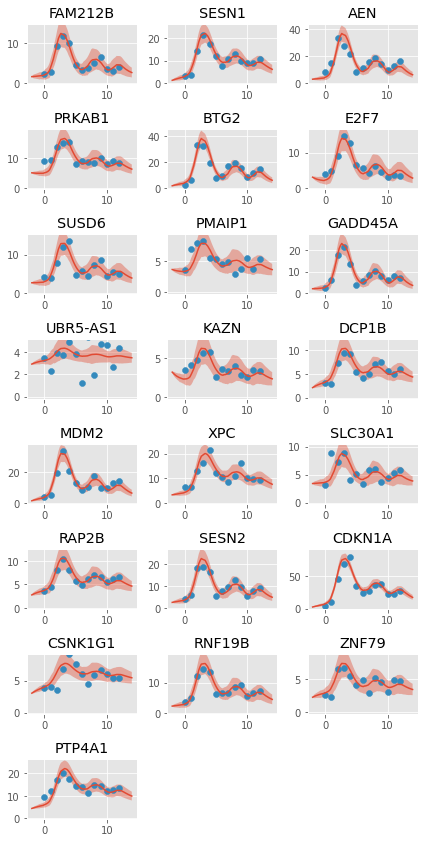

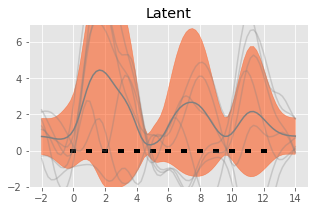

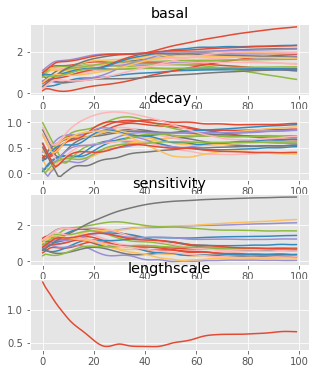

In [6]:
plotter.plot_losses(trainer, last_x=100)
plotter.plot_outputs(t_predict, replicate=0, t_scatter=t_observed,y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_latents(t_predict, ylim=(-2, 7), plot_inducing=False)
plotter.plot_convergence(trainer)

In [7]:
save(model, 'nonlinear')

In [8]:
do_load = False
if do_load:
    model = load('nonlinear', NonLinearLFM, num_genes, num_tfs,
                 t_inducing, dataset, extra_points=2, fixed_variance=dataset.variance)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    trainer = TranscriptionalTrainer(model, optimizer, dataset)
